<a href="https://colab.research.google.com/github/DSJibran/NETFLIX-MOVIE-AND-TV-SHOWS/blob/main/NETFLIX_MOVIE_AND_TV_SHOWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##**Loading the Dataset**

In [3]:
netflix = pd.read_csv("/content/drive/MyDrive/Datasets/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
netflix_cp = netflix.copy()
netflix_cp.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
netflix_cp.describe(include = "all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [6]:
print(f"Netflix datasets shape:{netflix_cp.shape}")

Netflix datasets shape:(7787, 12)


There are 7787 rows and 12 columns provided in the data.

#**Data Cleaning & Data Visualization**

###**Checking NaN values**

In [7]:
# Check for null values.
null_check = pd.DataFrame({"No Of Total Values": netflix_cp.shape[0] , "No of NaN values": netflix_cp.isnull().sum(),
                    "%age of NaN values" : round((netflix_cp.isnull().sum()/ netflix_cp.shape[0])*100 , 2) })
null_check.sort_values("No of NaN values" , ascending = False)

,No Of Total Values,No of NaN values,%age of NaN values
director,7787,2389,30.68
cast,7787,718,9.22
country,7787,507,6.51
date_added,7787,10,0.13
rating,7787,7,0.09
show_id,7787,0,0.00
type,7787,0,0.00
title,7787,0,0.00
release_year,7787,0,0.00
duration,7787,0,0.00


here, we found NaN values in some columns director,cast,country,date_added,rating.

Let's plot the null values present in the dataset.

Text(0.5, 1.0, 'Missing values in Colmuns')

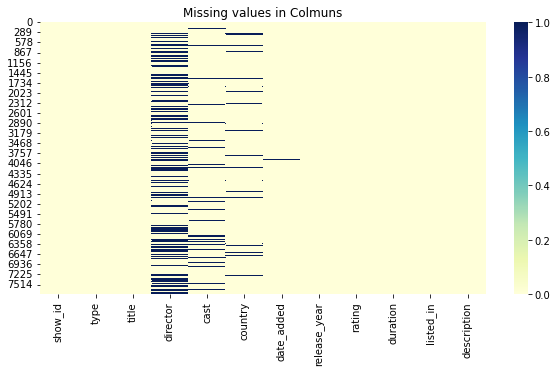

In [8]:
Nan_value = netflix_cp.isna()
plt.figure(figsize = (10,5))
sns.heatmap(Nan_value,cmap="YlGnBu").set_title("Missing values in Colmuns")

A Columns which have Null values are director, cast, country, date_added, and rating.

####**Lets clean the data before we go any further.**

**First replace few null values.**

In [9]:
# Number of null values in rating.
netflix_cp.rating.isnull().sum()

7

In [10]:
netflix_cp.date_added.isnull().sum()

10

In [11]:
# Remove null values in rating.
netflix_cp.dropna(subset=['rating'], inplace=True)
netflix_cp.rating.isnull().sum()

0

In [12]:
netflix_cp.dropna(subset=['date_added'], inplace=True)
netflix_cp.date_added.isnull().sum()

0

After dropping rating null value.

In [13]:
print(f"Netflix datasets shape:{netflix_cp.shape}")

Netflix datasets shape:(7770, 12)


Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.

##**No duplicate values exist.**

In [14]:
# Check for duplicated entries.
print(f"Total number of duplicated entries : {netflix_cp.duplicated().sum()}.")

Total number of duplicated entries : 0.


###**Extract more data from `data_added`.**

In [15]:
# Create new features to store date, day, month and year seperately.
netflix_cp['date_added'] = pd.to_datetime(netflix_cp['date_added'])
netflix_cp['days'] = netflix_cp['date_added'].dt.day
netflix_cp['months'] = netflix_cp['date_added'].dt.month
netflix_cp['years'] = netflix_cp['date_added'].dt.year

In [16]:
netflix_cp['years'].max()

2021

In [17]:
netflix_cp.drop('date_added',axis = 1,inplace = True)

In [18]:
netflix_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      5394 non-null   object
 4   cast          7052 non-null   object
 5   country       7265 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   object
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  days          7770 non-null   int64 
 12  months        7770 non-null   int64 
 13  years         7770 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 910.5+ KB


In [19]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = netflix_cp.loc[netflix_cp["type"] == "Movie"]
tv_rows = netflix_cp.loc[netflix_cp["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / netflix_cp["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / netflix_cp["type"].shape[0] * 100, 2)

#Top most commen Actors an directors (Movies and tv shows):
casts = ", ".join(netflix_cp.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]

##**1. What type of content is available on Netflix.**

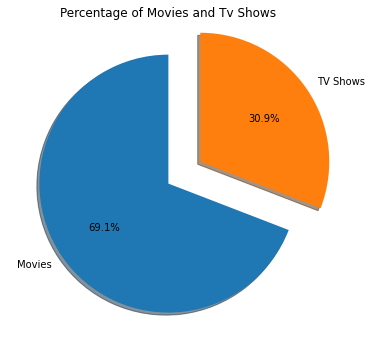

In [20]:
# Pie chart of type percentages
plt.figure(figsize = (10,5))
plt.pie([movies_per, tvshows_per], explode=(0, 0.3,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Percentage of Movies and Tv Shows')
plt.tight_layout()

plt.show()

**69.1% of the content available on Netflix are movies, and 30.9% are TV Shows.**

##**2. How many Movie/TV shows are released per year.**

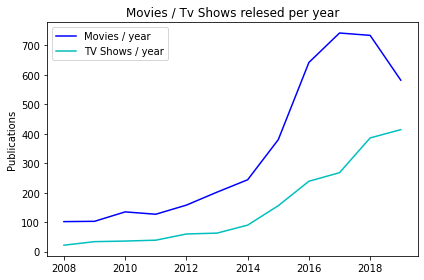

In [21]:
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows, color="c", label="TV Shows / year")
plt.ylabel('Publications')
plt.title('Movies / Tv Shows relesed per year')
plt.tight_layout()

plt.show()

**From 2014 to 2019 the release of movies is greater than TV-shows.**

##**3. In Which year most of the content was added.**

In [22]:
# Put the data into bins.
release_year = pd.cut(netflix_cp.release_year, [1924, 1999, 2010, 2021])
release_year.value_counts()
release_year = pd.DataFrame(release_year.value_counts()).reset_index()
release_year.rename(columns={'index':'Most_content_year', 'release_year':'count'}, inplace=True)
release_year['Most_content_year'] = release_year['Most_content_year'].astype('string')
release_year

,Most_content_year,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


In [23]:
# Plot it.
px.pie(release_year, values='count', names='Most_content_year', color_discrete_sequence=px.colors.sequential.Plasma_r, title='Which was most content released.',height=500, width=500)


**82% of the content available was released between 2010 and 2021.**

**17.28% of the content available was released before 2010.**

# **4. In which months do most movies and TV shows are added?**

In [24]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(netflix_cp.months.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'months':'count'}, inplace=True)

fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#000000', '#564dbd'])
fig.update_layout(
    title={
        'text': 'Month wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500)

#####**1. It's Clearly see that content is uploaded either by year ending or beginning.**

#####**2. November, December, and January are months in which many shows and movies get uploaded to the platform.**

##**5. Which Days are Outstanding?**

In [25]:
# Create dataframe to store day values and count.
days_df = pd.DataFrame(netflix_cp.days.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'days':'count'}, inplace=True)

fig = px.bar(days_df, x="day",y='count', text_auto=True, color='count', color_continuous_scale=['#000000', '#564dbd'])
fig.update_layout(
    title={
        'text': 'Day wise addition of movies and shows to the platform',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=800,
        height=500)

####**Here, we clearly see that most of content is uploaded at the beginning,middle,or at the end of a month.**

##**6. How many no of categories are present there in each content**

In [26]:
type(netflix_cp['listed_in'])

pandas.core.series.Series

In [27]:
netflix_cp['listed_in'].iloc[0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [28]:
(netflix_cp['listed_in'].iloc[0]).split(',')

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [29]:
no_of_categories = []
for catergory in netflix_cp.listed_in.values:
  len_cat = len(catergory.split(","))
  no_of_categories.append(len_cat)

In [30]:
netflix_cp['no_of_category_listed_in'] = no_of_categories
netflix_cp['no_of_category_listed_in'].unique()

array([3, 2, 1])

In [31]:
netflix_cp['no_of_category_listed_in'].value_counts()

3    3295
2    2682
1    1793
Name: no_of_category_listed_in, dtype: int64

Text(0, 0.5, 'Count')

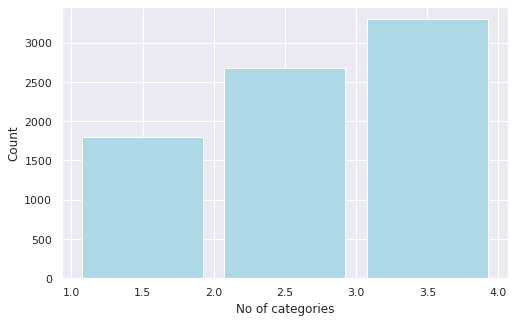

In [32]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,5))
plt.hist(netflix_cp.no_of_category_listed_in , bins=[1,2,3,4] , range = (1 ,4) , rwidth = 0.85, color ='lightblue')
plt.xlabel("No of categories")
plt.ylabel("Count")

###**7. Which director has directed the most movies and TV shows?**

In [33]:
#replace null values in director.
netflix_cp['director'] = netflix_cp['director'].fillna('')

directors_list = netflix_cp.director.value_counts().reset_index().head(15)[1:]  # We will exclude the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#db74ca', '#563a4d'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)

#####**Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows.**

###**8. Which Actor/Actress have been cast in most of the movies and TV shows?**

In [34]:
#create list of all the actors in the data.
def data2list(data):
  actor = {}
  temp = []
  cast = list(data['cast'])
  for i in range(len(cast)):
    temp.extend(str(cast[i]).split(','))
  for i in temp:
    if i not in actor:
      actor[i] = temp.count(i)
  return actor

#create dataframe for list of actors

actor_list = pd.DataFrame([data2list(netflix_cp)]).T.reset_index()
actor_list = actor_list.sort_values(0,ascending = False).drop(106)

In [35]:
# Plot it.
top_actors = actor_list.head(10)
top_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#16334d', '#db0450'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Happy to see 6 of the actors in the top 10 list of most numbers tv shows and movies are from India.**

###**9. Which Genre is more popular in these countries?.**

In [36]:
conuntry_vs_genre = netflix_cp[['country', 'listed_in']]
def country_wise_genre(country):
  country_genre = conuntry_vs_genre[conuntry_vs_genre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict
# Define list of top ten countries.
country_list = ['India', 'United Kingdom', 'Spain', 'Japan', 'France', 'United States','South Korea', 'Mexico', 'Australia','Canada']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)


df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['India', 'United Kingdom', 'Spain', 'Japan', 'France', 'United States','South Korea', 'Mexico', 'Australia','Canada'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'], name='India'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'],  name='United States'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )


1. Regional delicacies are more prevalent in some nations, such as anime in Japan and Korean TV shows in South Korea. This makes sense because anime has long been popular in Japan, and the expansion of k-pop culture explains the rise in Korean TV Shows.
2. In the UK, British and foreign television programming predominates.
3. Drama, International Movies, and Comedies seem popular choices in most countries.
4. It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.

###**10. Total number of unique titles present in the title column.**

In [37]:
print(f"Total number Unique Title:{netflix_cp['title'].nunique()}")

Total number Unique Title:7770


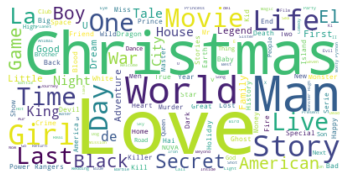

In [38]:
#subsetting df
netflix_wordcloud = netflix_cp['title']
text = " ".join(word for word in netflix_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most occurring words in the Title
 column of the tv shows and movies are `Christmas`, `Girl`, `Love`, `World`, `Last`, `Man`,`One`.


###**11. Total number of unique Description present in the title column.**

Total number Unique Description:7752


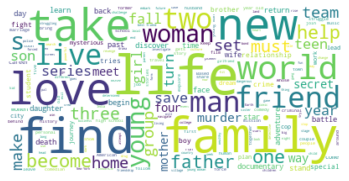

In [39]:
print(f"Total number Unique Description:{netflix_cp['description'].nunique()}")

#subsetting df
netflix_wordcloud = netflix_cp['description']
text = " ".join(word for word in netflix_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most occurring words in the description column of the tv shows and movies are `Family`, `Friend`, `Love`, `Life`, `Woman`, `Man`,and many other words. 

###**12. Most popular TV-Shows Rating.**

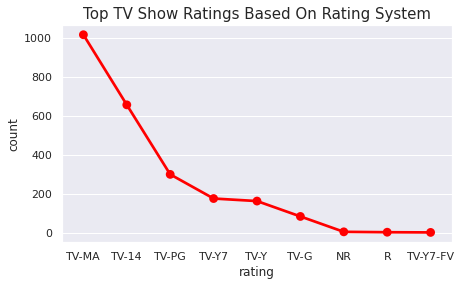

In [40]:
df_tv_show = netflix_cp[netflix_cp['type']== 'TV Show' ]
df_tv_show.head(2) 

#Pointplot on top tv show ratings 
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',color = "red",data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

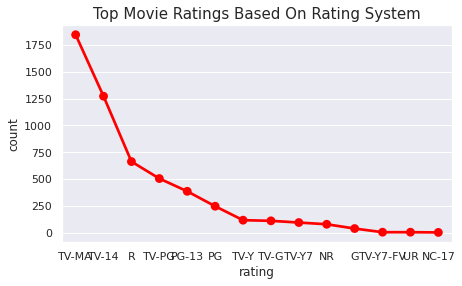

In [41]:
df_movie = netflix_cp[netflix_cp['type']== 'Movie' ]
df_movie.head(2) 
#Pointplot on top tv show ratings 
tv_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (7,4)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',color = "red",data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='15')
plt.show()


Most of the contents got ratings like


*   TV-MA (For Mature Audiences)
*   TV-14 (May be unsuitable for children under 14)
*   TV-PG (Parental Guidance Suggested)
*   NR (Not Rated)

#**Year Vs Type**


###Netflix has increasingly focused on TV rather than movies in recent years.

#####**We use Hypothesis Testing to check if there is any relation between year and type.**


*  **Null Hypothesis :** year has no impact on the type of content that gets added to the platform.
*   **Alternative Hypothesis :** year_added has an impact on the type of content that gets added to the platform.


In [42]:
hypothesis_data = pd.crosstab(netflix_cp['type'],netflix_cp['years'],margins = False)
hypothesis_data

years,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
type,,,,,,,,,,,,,,
Movie,1,2,1,13,3,6,19,58,256,861,1255,1497,1312,88
TV Show,1,0,0,0,0,5,6,30,184,361,429,656,697,29


The number of movies on Netflix is growing significantly faster than the number of TV shows. Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019

##**Create Cluster for our data.**

In [43]:
#create cluster of text
cluster = netflix_cp[['title']]
cluster['cluster_value'] = (netflix_cp['description'] +'| '+ netflix_cp['listed_in'] +'| '+ netflix_cp['director'] +' |'+ netflix_cp['cast'] +' |'+ netflix_cp['country'] +'| '+ netflix_cp['rating']).astype(str)
cluster.set_index('title',inplace= True);
cluster.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cluster_value
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


###**Dropping Irrelevent features**

In [44]:
netflix_cp.drop(['director','cast'],axis=1, inplace=True)

#**NLP Data**

#####Download ntlk

In [45]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [47]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

##**Data Preprocessing**



###**Description**

#####**Removing Puntuations**

In [48]:
#let remove punctuation from text.
def remove_punch(text):
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)

In [51]:
cluster['cluster_value'] = cluster['cluster_value'].apply(remove_punch)
netflix_cp.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,country,release_year,rating,duration,listed_in,description,days,months,years,no_of_category_listed_in
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,3
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,2


#####**Removing stopwords**

In [52]:
#removing stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
#extracting the stopwards from nltk 
stopw = nltk.corpus.stopwords.words('english')
for i in stopw:
  print(i,end = ', ')

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [54]:
print(f"Length of stopwords in English:{len(stopw)}")

Length of stopwords in English:179


In [55]:
def remove_stopword(text):
  text1 = [word.lower() for word in text.split()if word.lower() not in stopw]
  return " ".join(text1)

In [56]:
netflix['description'] = netflix['description'].apply(remove_stopword)
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies","devastating earthquake hits mexico city, trapp..."


**Now all the data in description column are free from punctutation and stopwords**

###**Let's check the Vocabulary of description columns and also to count Vocabulary.**



####**CountVectorizer**

In [57]:
#create a count vectorrizer object
count_vector = CountVectorizer()
count_vector.fit(netflix_cp['description'])

#collect the vocabulary items.
vocabulary_item = count_vector.vocabulary_.items()
vocabulary_item

dict_items([('in', 8068), ('future', 6588), ('where', 17672), ('the', 16185), ('elite', 5226), ('inhabit', 8210), ('an', 796), ('island', 8476), ('paradise', 11645), ('far', 5908), ('from', 6513), ('crowded', 3881), ('slums', 14862), ('you', 18034), ('get', 6778), ('one', 11292), ('chance', 2789), ('to', 16373), ('join', 8669), ('saved', 14045), ('squalor', 15251), ('after', 528), ('devastating', 4453), ('earthquake', 5084), ('hits', 7614), ('mexico', 10215), ('city', 3040), ('trapped', 16581), ('survivors', 15766), ('all', 667), ('walks', 17485), ('of', 11224), ('life', 9363), ('wait', 17464), ('be', 1594), ('rescued', 13393), ('while', 17678), ('trying', 16714), ('desperately', 4406), ('stay', 15355), ('alive', 666), ('when', 17670), ('army', 1061), ('recruit', 13120), ('is', 8466), ('found', 6399), ('dead', 4130), ('his', 7596), ('fellow', 6011), ('soldiers', 14981), ('are', 1023), ('forced', 6340), ('confront', 3458), ('terrifying', 16131), ('secret', 14228), ('that', 16182), ('hau

In [58]:
vocabulary = []
count_of_vocab = []
for key,value in vocabulary_item:
  vocabulary.append(key)
  count_of_vocab.append(value)

####**Create new DataFrame before stremming(Description).**

In [59]:
# Store the count in panadas dataframe with vocab as index
vb_stremming = pd.DataFrame({'word':vocabulary,
                             'counts_of_word':count_of_vocab})
vb_stremming = vb_stremming.sort_values("counts_of_word" ,ascending=False)

In [60]:
vb_stremming.head() 

,word,counts_of_word
17502,şeref,18150
9956,ōarai,18149
11751,łukasz,18148
10610,über,18147
12550,ömer,18146


In [61]:
vb_stremming.tail() 

,word,counts_of_word
705,100,4
1061,10,3
7719,009,2
6697,007,1
1062,000,0


####**Most 10 acurred word in description.**

In [63]:
top_10_acurred_vocab = vb_stremming.head(10)

In [65]:
top_10_acurred_words = top_10_acurred_vocab.word.values
top_10_acurred_words

array(['şeref', 'ōarai', 'łukasz', 'über', 'ömer', 'émile', 'ángel',
       'álvaro', 'álex', 'zé'], dtype=object)

In [66]:
top_10_acurred_words_count = top_10_acurred_vocab.counts_of_word.values
top_10_acurred_words_count

array([18150, 18149, 18148, 18147, 18146, 18145, 18144, 18143, 18142,
       18141])

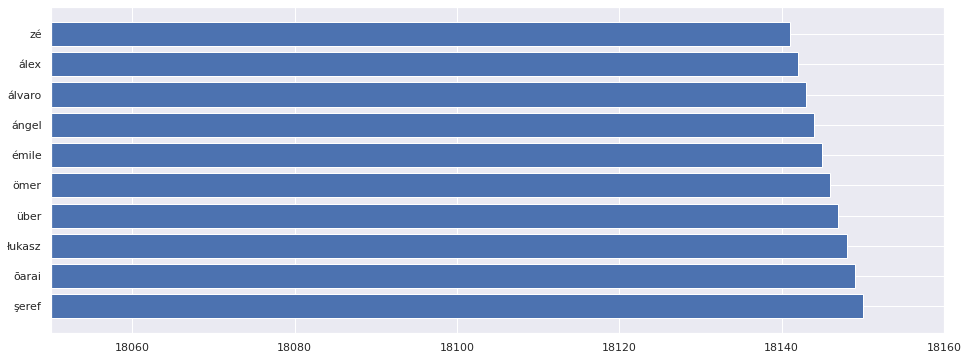

In [67]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(18050, 18160)
plt.barh(top_10_acurred_words , top_10_acurred_words_count )
plt.show()

####**Now will use SnowballStemmer( 'english' )**

In [68]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [69]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [70]:
#Stemming for description
netflix_cp['description'] = netflix_cp['description'].apply( Apply_stemming )
netflix_cp.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description,days,months,years,no_of_category_listed_in
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,14,8,2020,3
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies","after a devast earthquak hit mexico city, trap...",23,12,2016,2
2,s3,Movie,23:59,Singapore,2011,R,78 min,"Horror Movies, International Movies","when an armi recruit is found dead, his fellow...",20,12,2018,2
3,s4,Movie,9,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","in a postapocalypt world, rag-dol robot hide i...",16,11,2017,3
4,s5,Movie,21,United States,2008,PG-13,123 min,Dramas,a brilliant group of student becom card-count ...,1,1,2020,1


####**Now again will use TfidfVectorizer (after stemming)**

In [71]:
T_vector = TfidfVectorizer()
X = T_vector.fit_transform(netflix_cp['description'])

#collect the vocabulary items used in the vector
dictionary = T_vector.vocabulary_.items()
dictionary

dict_items([('in', 7007), ('futur', 5691), ('where', 15261), ('the', 13969), ('elit', 4529), ('inhabit', 7133), ('an', 703), ('island', 7353), ('paradis', 10218), ('far', 5104), ('from', 5626), ('crowd', 3409), ('slums', 12851), ('you', 15574), ('get', 5864), ('one', 9916), ('chanc', 2500), ('to', 14134), ('join', 7545), ('save', 12166), ('squalor', 13184), ('after', 460), ('devast', 3874), ('earthquak', 4404), ('hit', 6616), ('mexico', 8932), ('city', 2742), ('trap', 14301), ('survivor', 13618), ('all', 588), ('walk', 15099), ('of', 9852), ('life', 8172), ('wait', 15088), ('be', 1420), ('rescu', 11612), ('while', 15268), ('tri', 14338), ('desper', 3835), ('stay', 13273), ('alive', 587), ('when', 15259), ('armi', 944), ('recruit', 11421), ('is', 7344), ('found', 5522), ('dead', 3631), ('his', 6605), ('fellow', 5184), ('soldier', 12958), ('are', 914), ('forc', 5467), ('confront', 3074), ('terrifi', 13924), ('secret', 12320), ('that', 13966), ('haunt', 6404), ('their', 13976), ('jungl', 

In [72]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

###**Create new DataFrame after stremming.**

In [73]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [74]:
vocab_after_stemming.head()

,Word,count
15098,şeref,15684
8547,ōarai,15683
10087,łukasz,15682
9113,über,15681
10766,ömer,15680


In [75]:
vocab_after_stemming.tail()

,Word,count
670,100,4
995,10,3
6626,009,2
5785,007,1
996,000,0


In [76]:
top_10_after_strem_ocurred_vocab = vocab_after_stemming.head(10)

In [77]:
top_10_after_strem_ocurred_word = top_10_after_strem_ocurred_vocab['Word'].values
top_10_after_strem_ocurred_word

array(['şeref', 'ōarai', 'łukasz', 'über', 'ömer', 'émile', 'ángel',
       'álvaro', 'álex', 'zé'], dtype=object)

In [78]:
top_10_after_strem_ocurred_count = top_10_after_strem_ocurred_vocab['count'].values
top_10_after_strem_ocurred_count

array([15684, 15683, 15682, 15681, 15680, 15679, 15678, 15677, 15676,
       15675])

<BarContainer object of 10 artists>

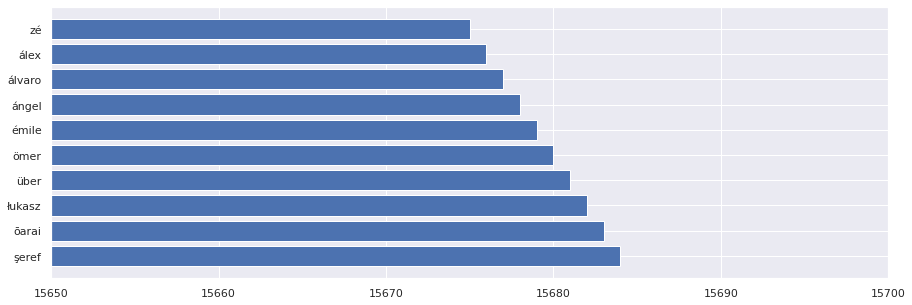

In [79]:
plt.figure(figsize = (15,5))
plt.xlim(15650,15700)
plt.barh(top_10_after_strem_ocurred_word,top_10_after_strem_ocurred_count)

###**Insert a new column length which will contain length of description.**

In [80]:
netflix_cp['description_Length'] = netflix_cp['description'].apply(lambda x: len(x))
netflix_cp.head(2)

,show_id,type,title,country,release_year,rating,duration,listed_in,description,days,months,years,no_of_category_listed_in,description_Length
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",in a futur where the elit inhabit an island pa...,14,8,2020,3,129
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,"Dramas, International Movies","after a devast earthquak hit mexico city, trap...",23,12,2016,2,126


In [81]:
print(f"Length of a descriptions : {len(netflix_cp['description'].iloc[0])}")

Length of a descriptions : 129


###**Now check the Vocabulary of Listed_in columns and also to count Vocabulary.**

In [82]:
#remove punctuations

netflix_cp['listed_in'] = netflix_cp['listed_in'].apply(remove_punch)
netflix_cp.head(2)

,show_id,type,title,country,release_year,rating,duration,listed_in,description,days,months,years,no_of_category_listed_in,description_Length
0,s1,TV Show,3%,Brazil,2020,TV-MA,4 Seasons,International TV Shows TV Dramas TV SciFi Fan...,in a futur where the elit inhabit an island pa...,14,8,2020,3,129
1,s2,Movie,7:19,Mexico,2016,TV-MA,93 min,Dramas International Movies,"after a devast earthquak hit mexico city, trap...",23,12,2016,2,126


#####**Removing stopwords**

In [83]:
#remove stopwords

netflix_cp['listed_in'] = netflix_cp['listed_in'].apply(remove_stopword)
netflix_cp['listed_in'].head(2)

0    international tv shows tv dramas tv scifi fantasy
1                          dramas international movies
Name: listed_in, dtype: object

####**Using CountVectorizer() to count vocabulary items in listed_in.**

In [84]:
# Create a count vectorizer object
count_vector_listed_in = CountVectorizer()
count_vector_listed_in.fit(netflix_cp['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = count_vector_listed_in.vocabulary_.items()
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [85]:
vocab_listed_in = [ ]
count_of_vocab_listed_in = []
for key , value in dictionary:
  vocab_listed_in.append( key )
  count_of_vocab_listed_in.append( value )

####**Create new DataFrame before stremming(listed_in).**

In [86]:
listed_in_vocab_before_stem = pd.DataFrame({"Word_listed_in": vocab_listed_in ,
                                            "count_listed_in" :count_of_vocab_listed_in})
listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count_listed_in" ,ascending=False)
listed_in_vocab_before_stem.head()

,Word_listed_in,count_listed_in
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37
